In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv("../data/preprocessed_data.csv")
df.head()


,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,23,618391.0,68899.0,282.933034,5677,-1,5
1,20,451803.0,27928.0,206.713865,138,-1,3
2,24,1123801.0,68152.0,514.173762,1176,-1,5
3,24,971563.0,8725.0,2176.000000,6506,-1,6
4,23,1733850.0,160813.0,793.290073,10030,-1,4


In [39]:
scaler = StandardScaler()

columns_to_standardize = ['view_count','likes','dislikes','comment_count','channel_age','days_uploaded']

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.head()


,categoryId,view_count,likes,dislikes,comment_count,channel_age,days_uploaded
0,23,-0.244346,-0.142149,-0.217398,-0.062424,-1.826462,0.378304
1,20,-0.264323,-0.234575,-0.234555,-0.135938,-1.826462,-0.436714
2,24,-0.183740,-0.143834,-0.165345,-0.122162,-1.826462,0.378304
3,24,-0.201996,-0.277894,0.208735,-0.051421,-1.826462,0.785813
4,23,-0.110586,0.065199,-0.102515,-0.004650,-1.826462,-0.029205


In [40]:
features = ['categoryId', 'view_count', 'dislikes', 'comment_count', 'days_uploaded']
target = 'likes'

In [41]:
X = df[features]
X

,categoryId,view_count,dislikes,comment_count,days_uploaded
0,23,-0.244346,-0.217398,-0.062424,0.378304
1,20,-0.264323,-0.234555,-0.135938,-0.436714
2,24,-0.183740,-0.165345,-0.122162,0.378304
3,24,-0.201996,0.208735,-0.051421,0.785813
4,23,-0.110586,-0.102515,-0.004650,-0.029205
...,...,...,...,...,...
245838,24,-0.229847,-0.204945,-0.113614,-0.844223
245839,24,-0.224868,-0.200669,-0.112712,-0.436714
245840,24,-0.223284,-0.199308,-0.111836,-0.029205
245841,24,-0.222864,-0.198948,-0.111597,0.378304


In [42]:
y = df[target]
y

0        -0.142149
1        -0.234575
2        -0.143834
3        -0.277894
4         0.065199
            ...   
245838   -0.235125
245839   -0.233300
245840   -0.232278
245841   -0.231425
245842   -0.230938
Name: likes, Length: 245843, dtype: float64

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle=False, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196674, 5), (49169, 5), (196674,), (49169,))

In [44]:
model = LinearRegression()

model.fit(X_train[features], y_train)


LinearRegression()

In [45]:
pred_train = model.predict(X_train[features])
pred_test = model.predict(X_test[features])

pred_train, pred_test


(array([-0.21281818, -0.20365289, -0.1884509 , ...,  0.8624748 ,
        -0.23456058, -0.14379958]),
 array([-0.1381443 ,  0.14625725, -0.18468708, ..., -0.19566552,
        -0.21405939, -0.23223255]))

In [46]:
print(f"Train RMSLE = {np.sqrt(mean_squared_error(y_train, pred_train))}")
print(f"Test RMSLE = {np.sqrt(mean_squared_error(y_test, pred_test))}")

Train RMSLE = 0.38916215007667915
Test RMSLE = 0.44419550455971096


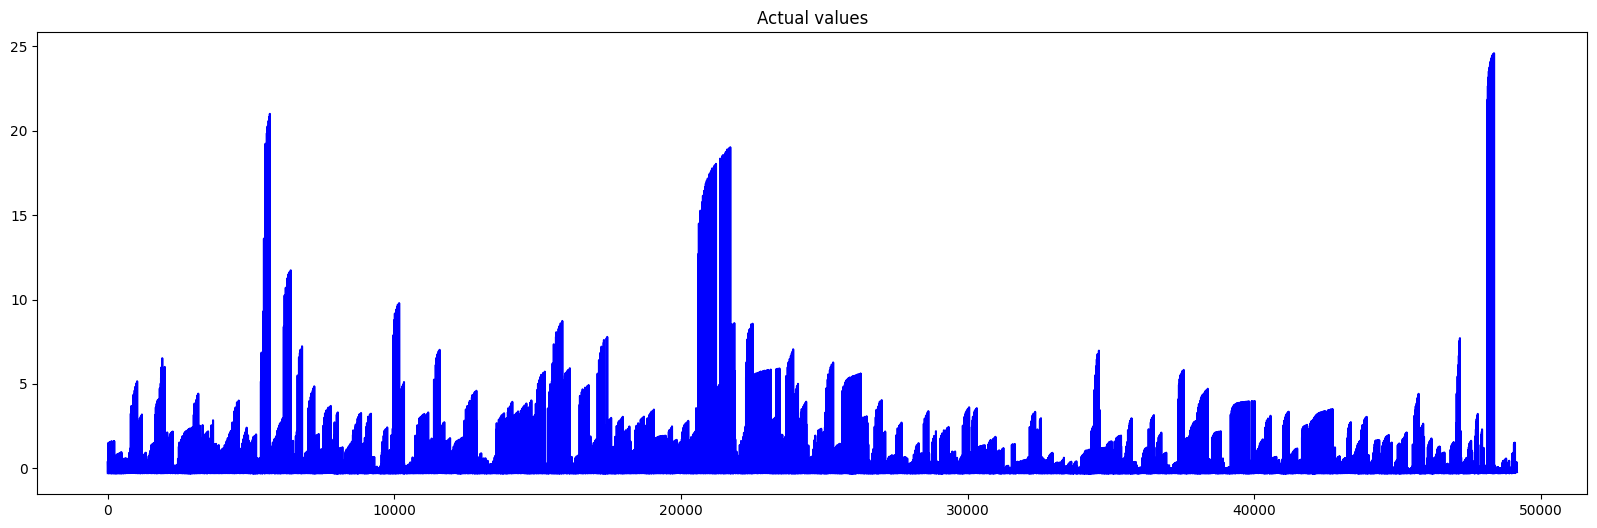

In [47]:
plt.figure(figsize=(20,6))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.title('Actual values')
plt.show()

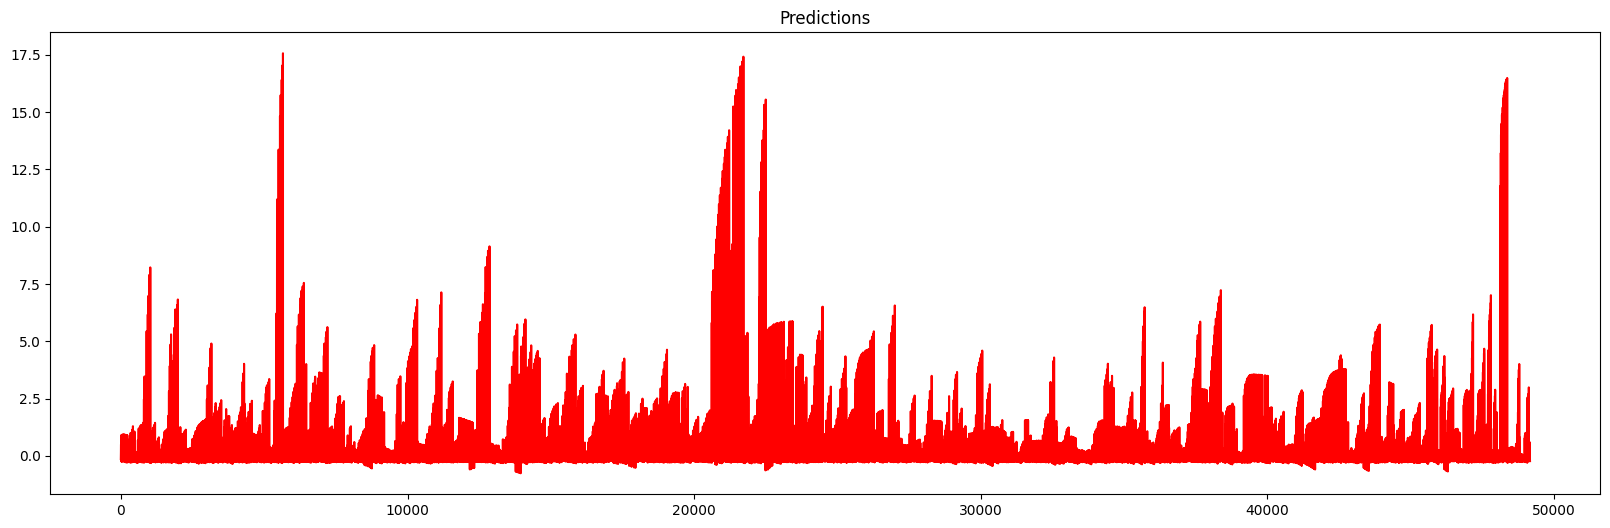

In [48]:
plt.figure(figsize=(20,6))
plt.plot(range(len(pred_test)), pred_test, color='red')
plt.title('Predictions')
plt.show()

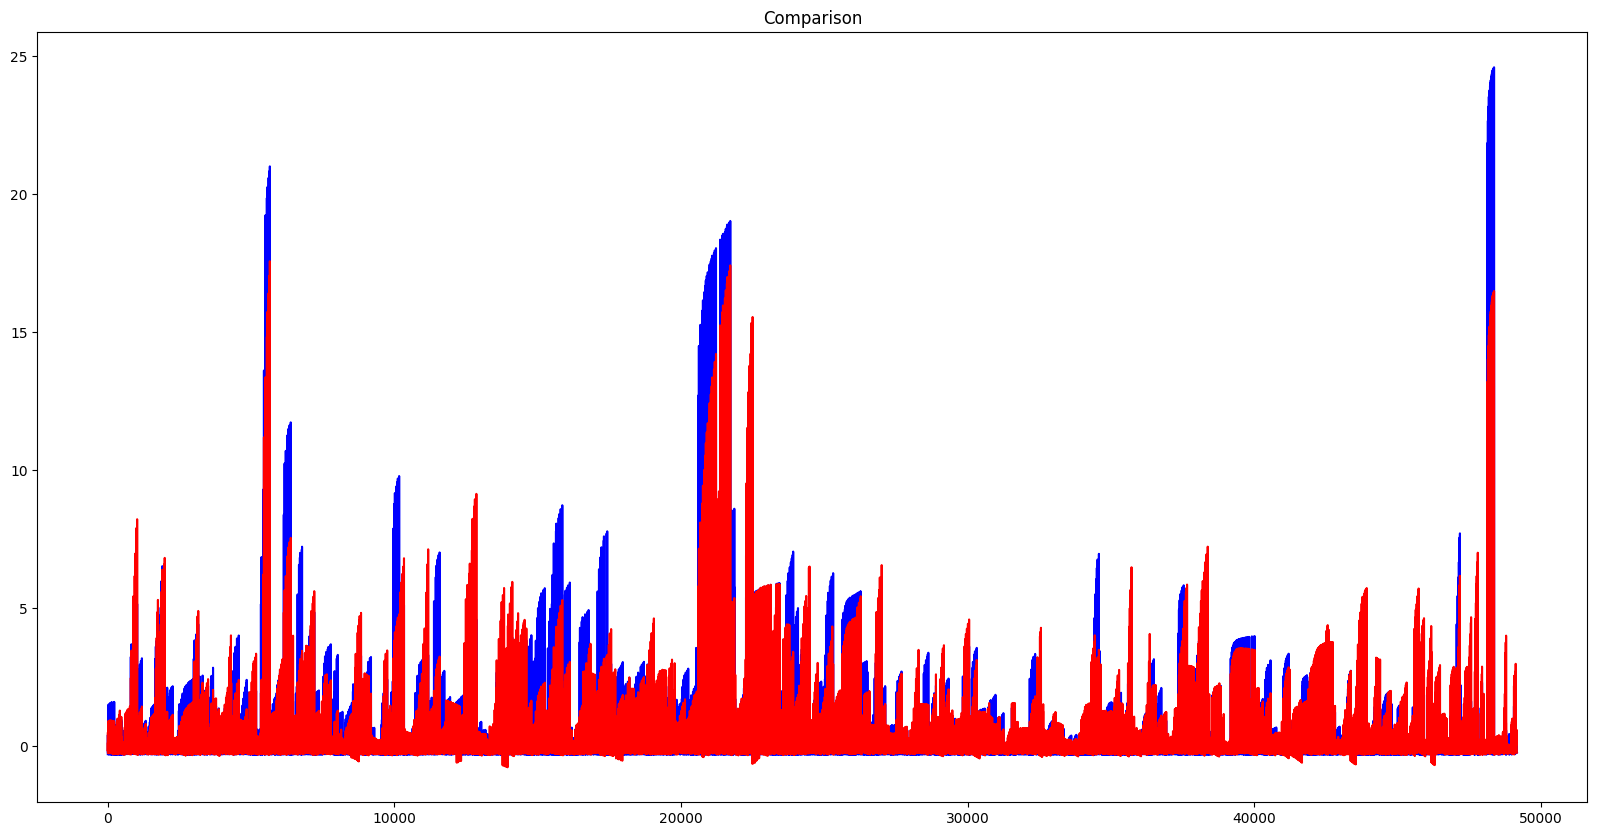

In [49]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)), y_test, color='blue')
plt.plot(range(len(pred_test)), pred_test, color='red')
plt.title('Comparison')
plt.show()